In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets


In [29]:
label = ['Tshirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'Ankelboot']

In [13]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
#60000개의 28x28 형태의 데이터

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


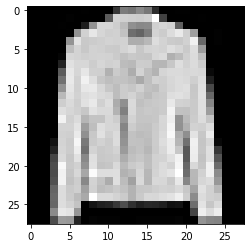

4
[[  0   0   0   0   0   0   0   1   0   0   0  55 123 116 137 119  45   0
    0   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0   0   0  91 212 208 206 204 208 255  66
    0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   1   0   0  30 145 214 214 206 187 144 136 138 208 214
  209  95   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1 147 209 231 214 207 209 194 110 100 124 211 204
  220 234 208 158   0   0   2   0   0   0]
 [  0   0   0   0   0 148 226 201 204 207 211 209 210 173 173 184 221 212
  203 201 209 240 104   0   2   0   0   0]
 [  0   0   0   0   0 189 211 200 210 208 203 202 211 219 199 211 213 210
  222 214 202 221 156   0   0   0   0   0]
 [  0   0   0   0   5 214 211 207 210 212 210 203 193 201 198 197 214 219
  176 188 207 219 191   0   0   0   0   0]
 [  0   0   0   0  34 224 215 215 205 214 208 212 188 185 205 204 183 182
  199 222 210 219 205   0   0   0   0   0]
 [  0   0   0   0  91 231 214 230 208 207 177 203 196 173 212 

In [14]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap='gray')
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [15]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [16]:
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [17]:
x_train = X_train.reshape(-1, 28 * 28) # 784x1 로 reshape
x_test = X_test.reshape(-1, 28 * 28)
x_train = x_train / 255 # 최소값 0, 최대값 255 이기 때문에 255로 나누어서 0~1사이의 값으로 scaling = MinMaxScaling
x_test = x_test / 255
print(x_train.shape)

(60000, 784)


In [20]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
#model.add(Dropout(0.2)) 비교해보려고 사용함 데이터가 깔끔해서 오히려 점수가 낮아진다
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.15))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) #다중분류기에서는 분류클래스 만큼 출력에 설정, 다중분류기 = softmax(확률 값으로)


In [21]:
#opt = Adam(lr=0.01)
model.compile(optimizer = 'Adam', loss='categorical_crossentropy', metrics='accuracy')
#다중분류기에서는 loss 'categoricla_crossentropy', metrics 'accuracy' 사용 / 이중분류기일때만 'binary_accuracy'
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
fit_hist = model.fit(x_train, y_train,
                     batch_size=200, epochs=50, verbose=1)

Epoch 1/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0395 - accuracy: 0.9847
Epoch 2/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0315 - accuracy: 0.9881
Epoch 3/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0319 - accuracy: 0.9873
Epoch 4/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0327 - accuracy: 0.9876
Epoch 5/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0345 - accuracy: 0.9866
Epoch 6/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0398 - accuracy: 0.9847
Epoch 7/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0382 - accuracy: 0.9848
Epoch 8/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0368 - accuracy: 0.9858
Epoch 9/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0399 - accuracy: 0.9852
Epoch 10/50
300/300 [==============================] - 5s 16ms/step - loss: 0.0424 - accura

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Final test accuracy :', score[1])

Final test accuracy : 0.8970000147819519


KeyError: ignored

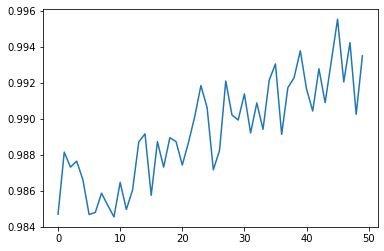

In [33]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

Ankelboot
[[3.92100428e-14 2.75290614e-13 1.08958197e-10 4.42051474e-12
  1.29479284e-20 8.98765109e-07 5.46208078e-14 8.93657131e-08
  1.00091035e-09 9.99999046e-01]]
Ankelboot


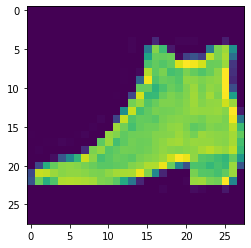

In [30]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 784))
print(pred)
print(label[np.argmax(pred)])

In [32]:
a = [1,4,8,3,7,2]
np.argmax(a) #제일 큰 값의 '인덱스 값'을 뽑아준다. a에서 가장 큰 값이 8이기 때문에 2

2